# Activation Functions

Testing differents activation functions

In [41]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(46)

# Generate synthetic data
n_samples = 100
class_0 = np.random.normal(loc=[-2, 2], scale=1.0, size=(n_samples // 2, 2))
class_1 = np.random.normal(loc=[2, -2], scale=1.0, size=(n_samples // 2, 2))

X = np.vstack([class_0, class_1])
Y = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])

# Plot the data
def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

-2.8


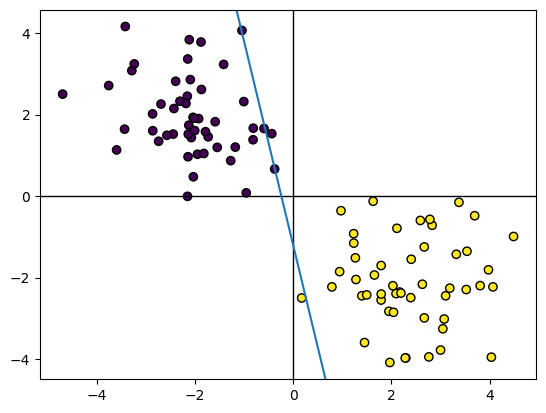

In [42]:
# Define the linear model
w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

In [43]:
perceptron = nn.Linear(2, 1)
activation = nn.Sigmoid() 

print(perceptron.weight.data)
print(perceptron.bias.data)

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias   = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[-0.3859,  0.3778]])
tensor([-0.2838])
tensor([[5., 1.]])
tensor([1.2000])


In [55]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

def plot_model_and_points():
  plt.figure(figsize=(8, 6))
  plotmodel(w1, w2, b)
  for k, idx in enumerate([5, 21, 43, 99]):
    x = torch.Tensor(X[idx])
    
    ret = perceptron(x)
    act = activation(ret)
    
    act_limiar = 0 if ret.data < 0 else 1
    
    label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' Act Func: {:5.2f}'.format(act.data.numpy()[0])
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
    
  plt.legend()
  plt.show()

Sigmoid Activation Function


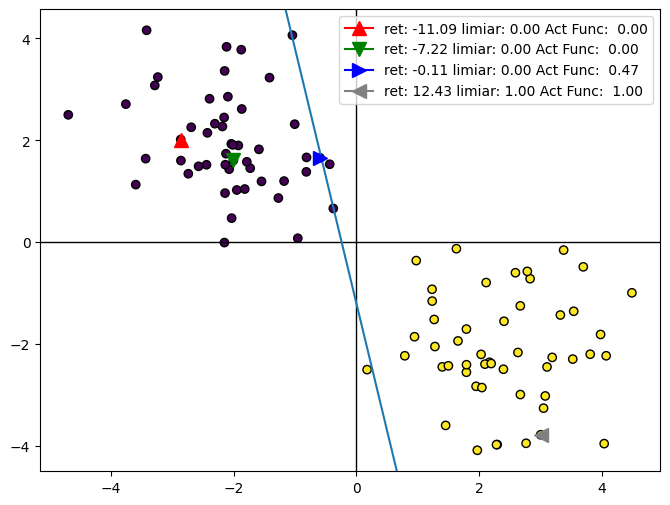

ReLU Activation Function


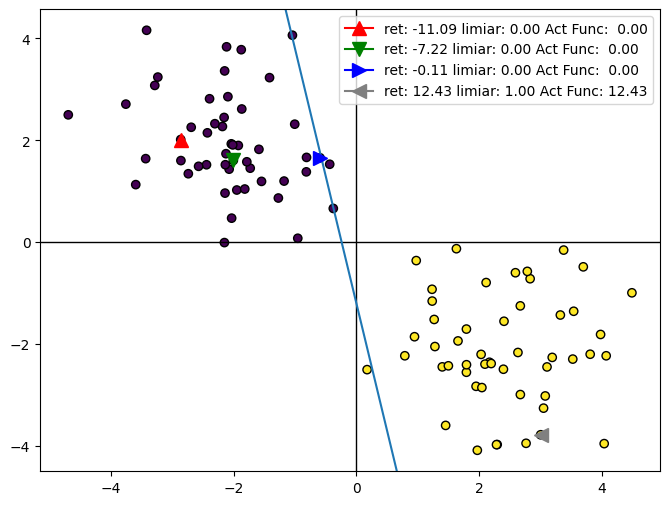

Tanh Activation Function


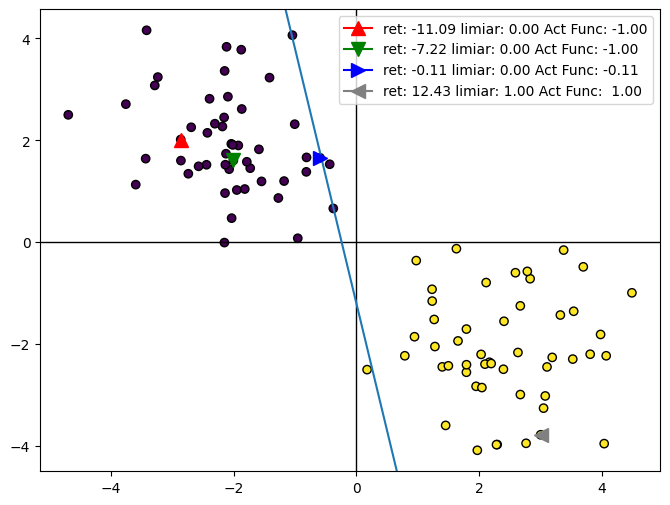

In [56]:
print("Sigmoid Activation Function")
activation = nn.Sigmoid() # Sigmoid always returns a value between 0 and 1
plot_model_and_points()

print("ReLU Activation Function")
activation = nn.ReLU() # ReLU always returns 0 for negative values and the value itself for positive values
plot_model_and_points()

print("Tanh Activation Function")
activation = nn.Tanh() # Tanh always returns a value between -1 and 1
plot_model_and_points()